# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

---
<div style="background-color: bisque; padding: 10px 10px 10px 10px">
    <h1> Hipótesis</h1>
La presunción que me gustaría poner a prueba es la siguiente: <strong>¿Existe una relación entre el precio de un alquiler y la cantidad de metros y locación del inmueble que sirva para predecir el precio?</strong>

<p>Esta hipótesis proviene de mi propia experiencia como inquilino. Me gustaría indagar qué tanto puede darse esta relación considerando los datos disponibles.</p> 
<hr>
    En prticular, considero que los datos más importantes para resolver esta pregunta son los datos concernientes al precio, tamaño y ubicación de las unidades. 
    Esta percepción, está basada en la experiencia que cada uno tiene como inquilino. Como tal, esta impresión puede ser válida para guiar el análisis de los datos aquí presentados.  
    Intentaremos responder la pregunta. 
</div>

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

## Importamos las librerías que usaremos durante el EDA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

## Construimos nuestro primer dataframe **df**, que irá decantando en otros a medida que avancemos 

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [5]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print("Numpero de filas: " , len(df.index))
print("Numpero de columnas: " , len(df.columns))
df.head(5)

Numpero de filas:  146660
Numpero de columnas:  19


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### Visualizamos que el dataset primegenio cuenta con 146660 filas, y 19 columnas. 

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
display(df.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

### ¿Cuántos tipos de propiedad hay publicados según este dataset?

In [7]:
#¿Cuántos tipos de propiedad hay publicados según este dataset?
print("Tipos de propiedades: ", len(df.property_type.unique()), " => ", df.property_type.unique())

Tipos de propiedades:  10  =>  ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


### ¿Cuántos instancias por cada tipo de propiedad hay en el dataset?

In [8]:
df["property_type"].value_counts(dropna=False, normalize=False).to_frame() 

,property_type
Departamento,107326
Casa,21521
PH,14298
Lote,1312
Oficina,658
Otro,374
Local comercial,325
Casa de campo,322
Depósito,265
Cochera,259


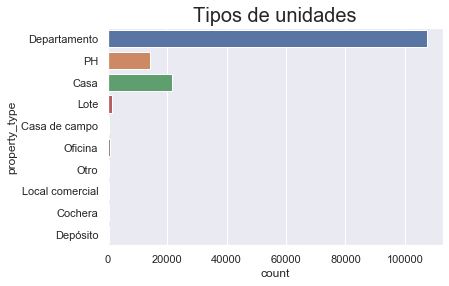

In [9]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
chart = sns.countplot(data = df, y='property_type').set_title('Tipos de unidades', size=20)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

#### Como la distribución de tipos de inmuebles es muy desigual, segmentamos la visualización de los valores más bajos

Text(0.5, 1.0, 'Distribución de tipos de unidades')

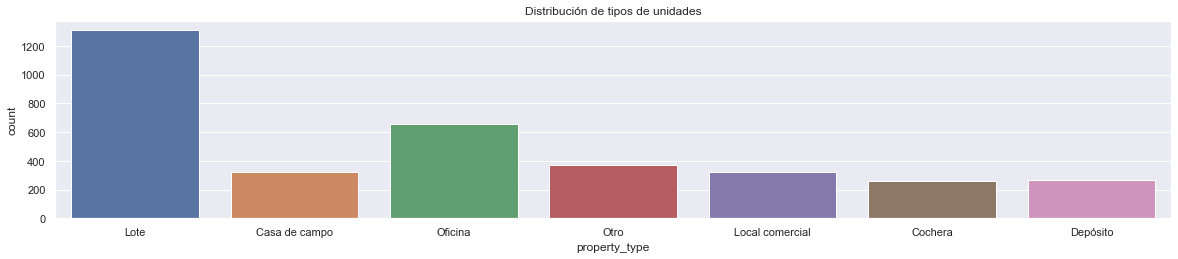

In [10]:
#hacer un gráfico aparte con los tipos de propiedad menos visibles en el primer gráfico
plt.figure(figsize = (20,8))
plt.subplot(2,1,1)
sns.countplot(x='property_type', data=df[(df['property_type'] != 'Departamento') & (df['property_type'] != 'Casa') & (df['property_type'] != 'PH')]).set_title('Distribución de tipos de unidades')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

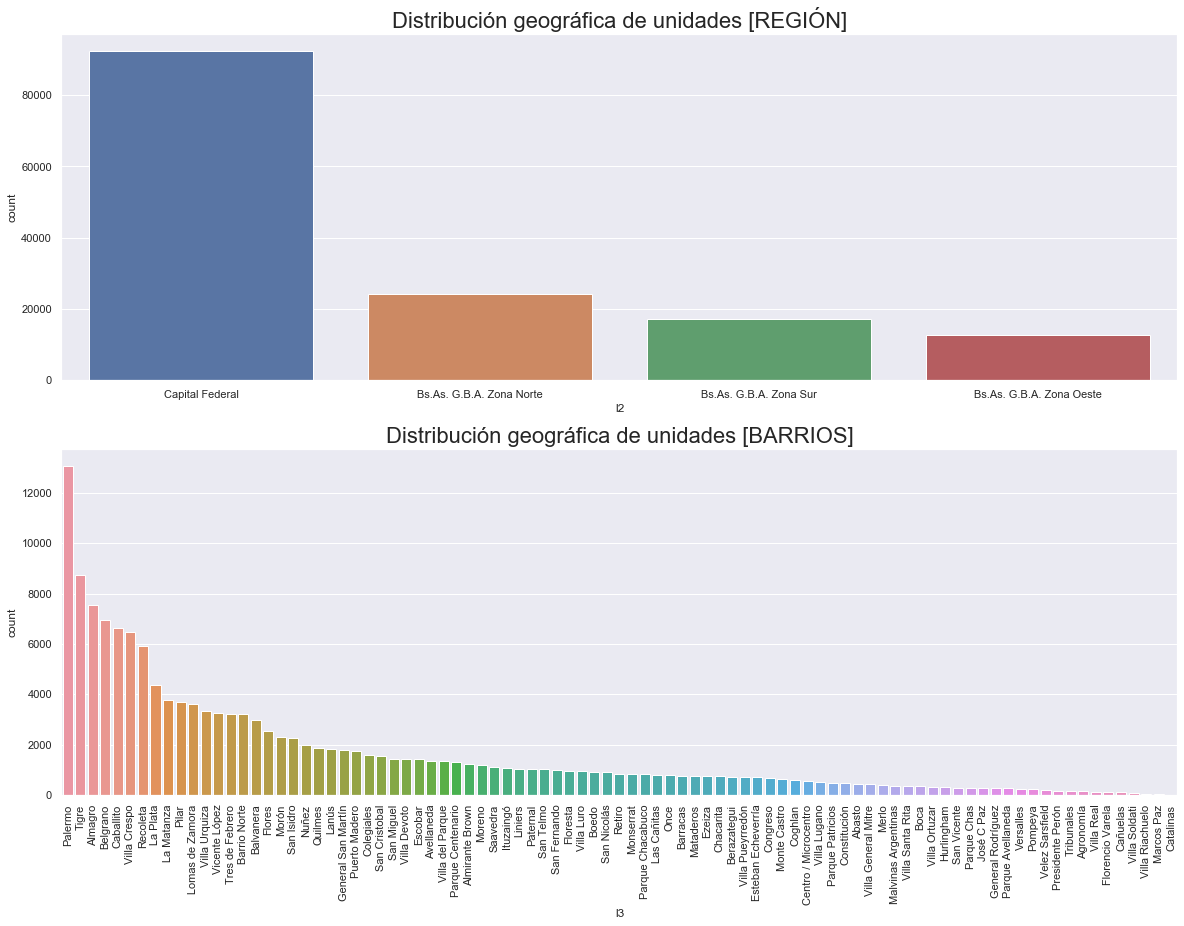

In [11]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
plt.figure(figsize = (20,14))
plt.subplot(2,1,1)
sns.countplot(df.l2, order = df['l2'].value_counts().index).set_title('Distribución geográfica de unidades [REGIÓN]', size=22)
plt.subplot(2,1,2)
sns.countplot(df.l3, order = df['l3'].value_counts().index).set_title('Distribución geográfica de unidades [BARRIOS]', size=22)
plt.xticks(rotation=90)
plt.show()

<div style="background-color: bisque; text-align:center; padding: 10px 10px 10px 10px;">
    <div>
    <h4>Como puede apreciarse, hay un número de unidades mayoritariamente provenientes de la región de CABA y alguno de sus barrios específicos, como Palermo, Tigre y Almagro. </h4>
    <p>Seguramente esto sea información importante a considerar en el momento de construcción del modelo</p>
    </div>
</div>

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
df5 = df[(df.property_type == 'Departamento') | (df.property_type == 'PH') | (df.property_type == 'Casa')]
df5 = df5[df5.l2 == 'Capital Federal']
print('SHAPE => ', df5.shape)
display(df5.describe())

SHAPE =>  (91485, 19)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [13]:
display(df5.isna().sum().to_frame())

,0
start_date,0
end_date,0
created_on,0
lat,4534
lon,4548
l1,0
l2,0
l3,0
rooms,0
bedrooms,0


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

#### Creamos datasets con las columnas indicadas

In [14]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
# Creo el dataset con los registros y columnas que me interesa anaizar en el pairplot
data = df5.loc[:, ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
# Muestra inicial del dataset
display(data.head())

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


### Creamos una función para remover outliers y obtener datos estadísticos más precisos

In [15]:
#FUNCIÓN PARA ELIMINAR OUTLIERS
def remove_outliers(data, column):
    '''
    Remueve los outliers de un dataset utilizando
    la tecnica de IQR Scores
    
    Fuente: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
    '''
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    filters = (data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))
    return data[filters]

#ES ACONSEJABLE ELIMINAR OUTLIERS EN SERIES CON MUCHA DIFERENCIA ENTRE LA MEDIA Y EL VALOR MÁXIMO (STD)

#### A) Comenzamos a obtener valores estadísticos de loas variables que nos interesan

In [16]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


<div style="background-color: bisque; padding: 10px 10px 10px 10px">
<h4>Primeras impresiones estadísticas</h4>
<ul>
    <li>Alta variabilidad en la diferencia entre mean y max en surface_covered</li>
    <li>Alta variabilidad en la diferencia entre mean y max en surface_total</li>
    <li>Alta variabilidad en la diferencia entre mean y max en price</li>
</ul>
</div>

#### B, C y E) Armamos un nuevo dataframe from 'data' que se llamará 'filtrado'
<p>Normalizaremos las series de precio y superficie para mejorar las condiciones de evaluación

In [17]:
# REMOVEMOS LOS OUTLIERS DE surface_total
filtrado = remove_outliers(data, 'surface_total')
filtrado.shape

(76278, 6)

In [18]:
# REMOVEMOS LOS OUTLIERS DE surface_covered
filtrado = remove_outliers(filtrado, 'surface_covered')
filtrado.shape

(72463, 6)

In [19]:
# REMOVEMOS LOS OUTLIERS DE pr
filtrado = remove_outliers(filtrado, 'price')
filtrado.shape

(68677, 6)

In [20]:
#COMPARAMOS LOS TAMAÑOS DEL DATASET PREVIO Y EL FILTRADO
print('Dataset anterior' , data.shape, ' =>  Dataset filtrado' , filtrado.shape)

Dataset anterior (91485, 6)  =>  Dataset filtrado (68677, 6)


### D) Las propiedades no pueden tener surface_covered mayor a surface_total. 

In [21]:
# Nos quedamos solo con aquellas propiedades cuyas superficies totales sean mayores o iguales a las cubiertas
filtrado = filtrado[(filtrado.surface_total >= filtrado.surface_covered)]
filtrado.shape

(68142, 6)

#### Comparamos las diferencias estadísticas entre el dataframe previo y el filtrado

In [22]:
display('Dataframe PREVIO', data.describe())
display('Dataframe FILTRADO', filtrado.describe())

'Dataframe PREVIO'

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


'Dataframe FILTRADO'

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,68142.000000,68142.000000,67434.000000,68142.000000,68142.000000,68142.000000
mean,2.697206,1.762085,1.330738,70.882730,62.205982,178430.146591
std,0.994677,0.840687,0.583773,32.525583,26.122440,80908.324330
min,1.000000,0.000000,1.000000,12.000000,2.000000,7500.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,116000.000000
50%,3.000000,2.000000,1.000000,63.000000,56.000000,160000.000000
75%,3.000000,2.000000,2.000000,87.000000,77.000000,228100.000000
max,21.000000,15.000000,14.000000,204.000000,148.000000,421000.000000


#### Comparamos la diferencia de distribución entre los valores del boxplot en materia de surface_total en los 2 datasets

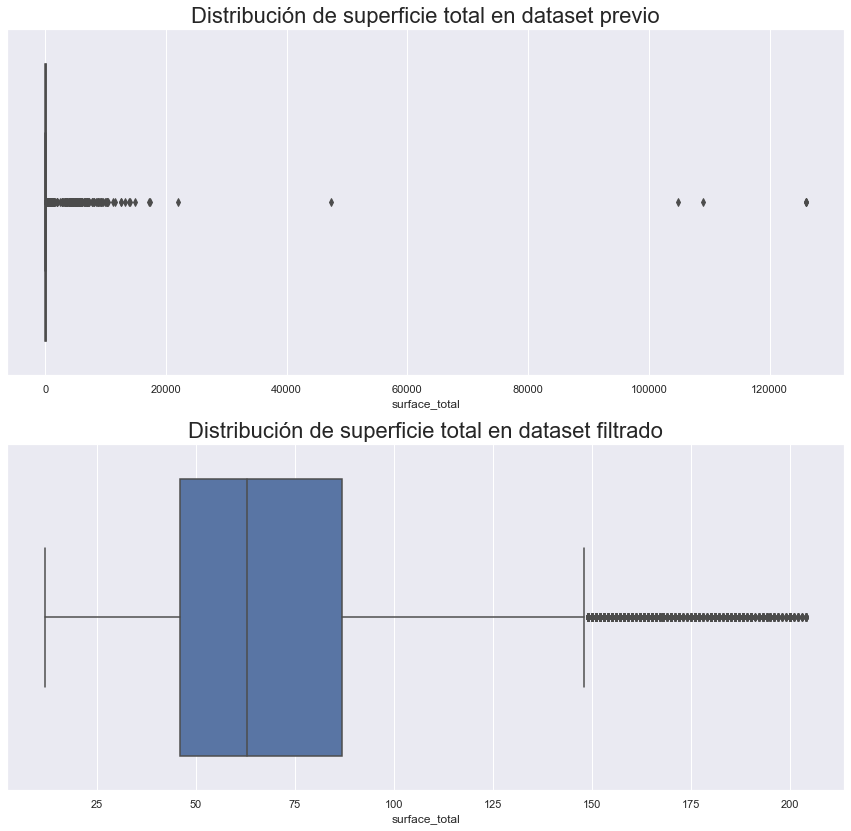

In [23]:
plt.figure(figsize = (15,14))
plt.subplot(2,1,1)
sns.boxplot(data.surface_total).set_title('Distribución de superficie total en dataset previo', size=22)
plt.subplot(2,1,2)
sns.boxplot(filtrado.surface_total).set_title('Distribución de superficie total en dataset filtrado', size=22)
plt.show()

### E) Pairploteamos el dataset filtrado y procesado.

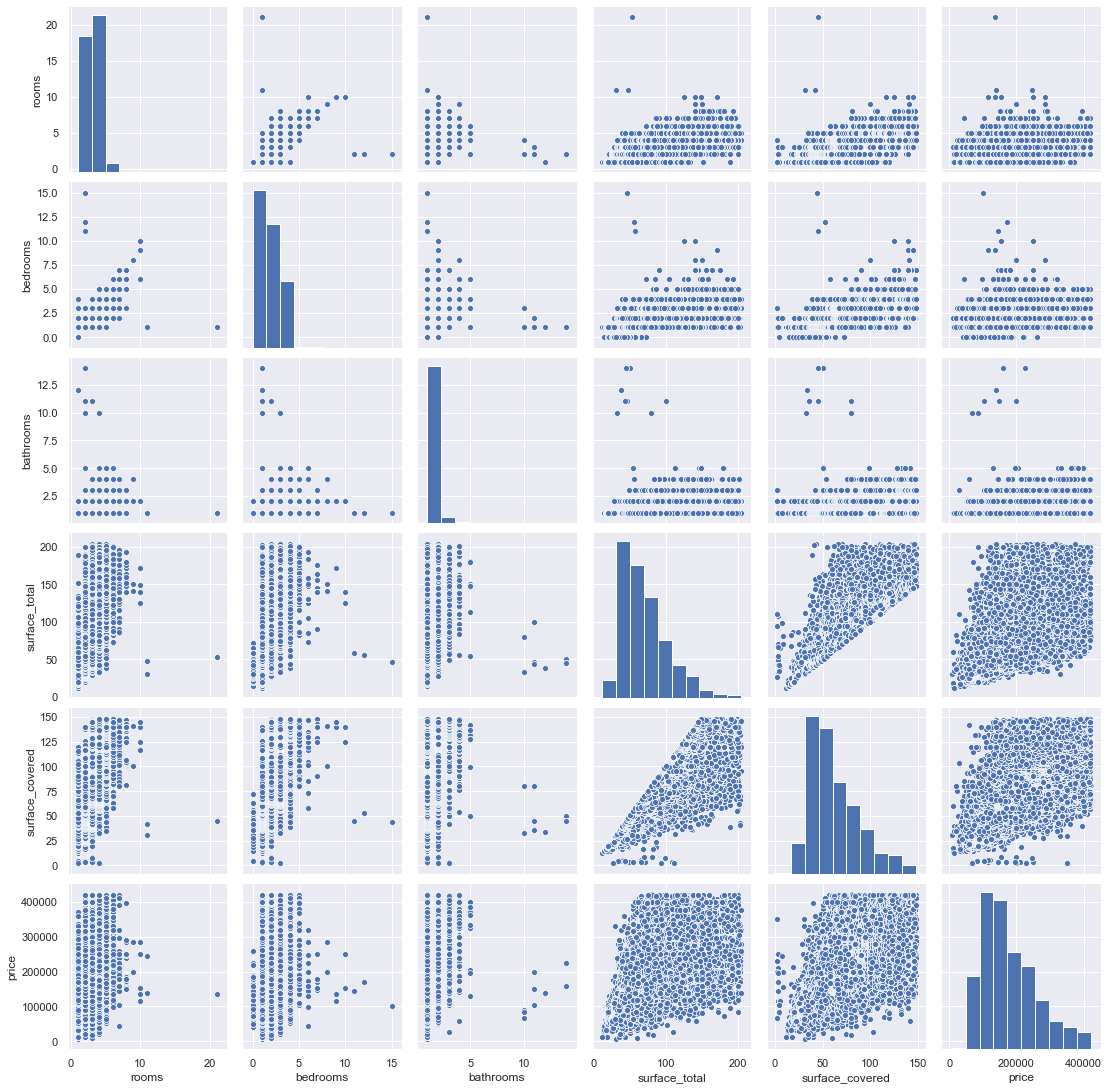

In [24]:
# PAIRPLOT
sns.pairplot(filtrado)

<h3 style="background-color: bisque; text-align:center; padding: 5px 5px 5px 5px">Advertencia: ejecutar la siguiente línea toma mucho tiempo</h3>

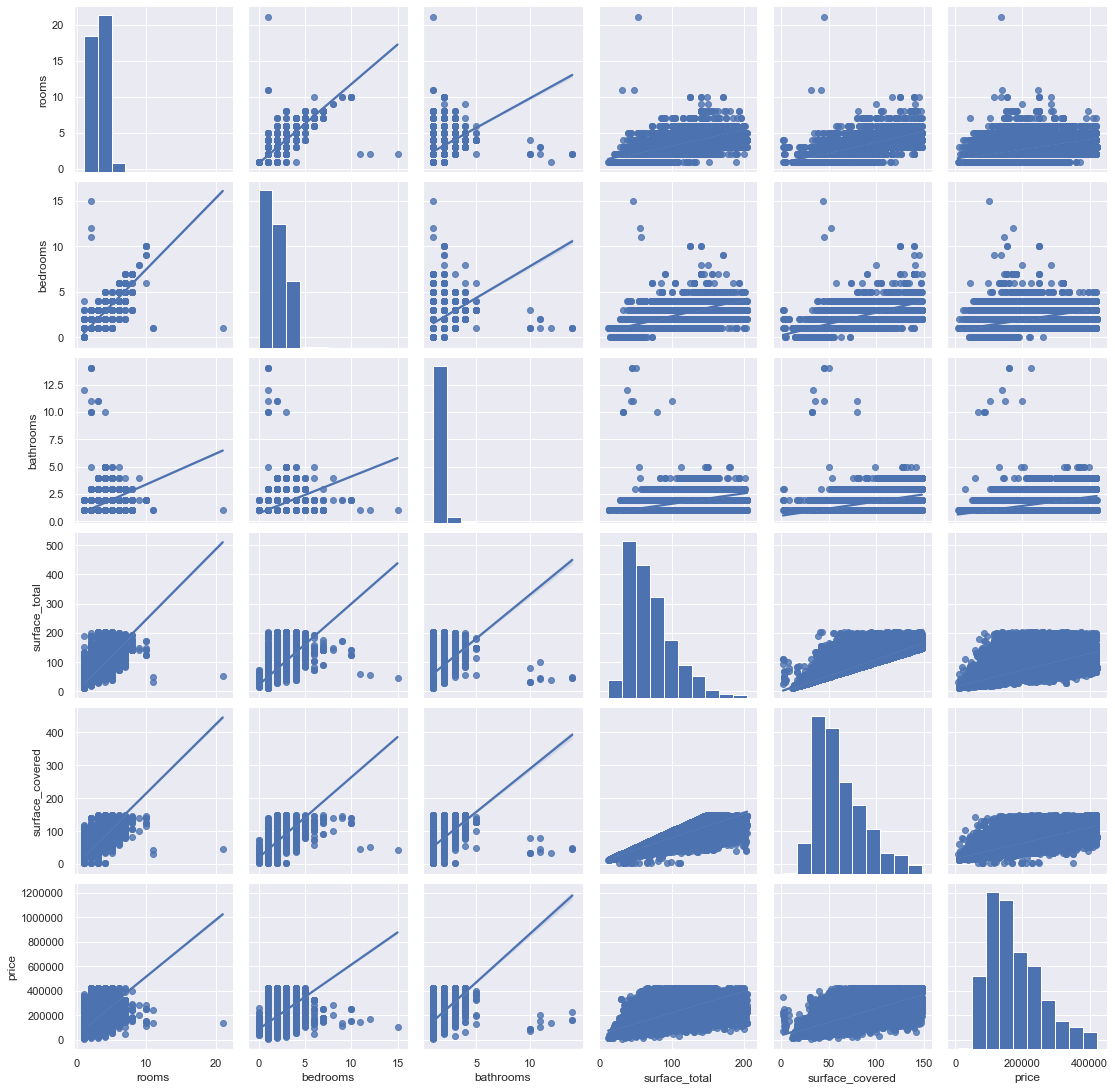

In [25]:
sns.pairplot(filtrado, vars=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'], kind = 'reg')

<div style="background-color: bisque; padding: 10px 10px 10px 10px">
    <h4> Respecto a las correlaciones, son difíciles de apreciar más allá de la correlación entre rooms y bedrooms, y superficies</h4>
    <ul>
        <li>Mi suposición es que si bien el dataset ha sido curado estadísticamente, hay una serie de procedimientos aún necesarios para indagar en correlaciones y relaciones con sentido</li>
        <li>Particularmente, considero que el acercamiento necesario no pasa por una cuestión estadística, sino de sentido común y conocimiento del campo, pues uno podría suponer que las correlaciones pueden darse solo en el marco de una comparación de unidades pertenecientes a regiones geográficas muy específicas (barrios)</li>
        <li>Lo mismo en relación al tipo de unidad </li>
        <li>Eso explica porqué la correlación aparentemente más fuerte se da sólo entre cuartos y baños, lo cual tiene mucho sentido evidente por sí mismo, pero no nos aporta info relevante. </li>
        <li>En la misma dirección, observamos que la correlación entre superficies también se encuentra positivamente correlacionada, pero el dato no es aporta información relevante. </li>
    </ul>
    
</div>


7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<div style="background-color: bisque; text-align:center; padding: 10px 10px 10px 10px">
    <h3>Usaremos un mapa de color para seguir explorando de manera visual las posibles correlaciones entre las variables</h3>
</div>

Text(0.5, 1, 'Correlaciones entre variables')

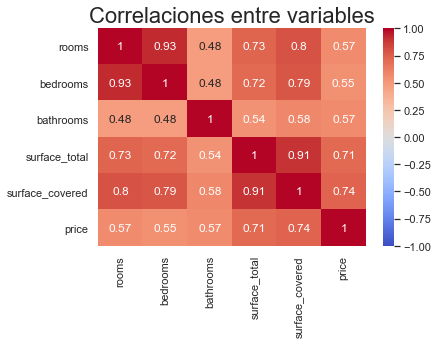

In [26]:
sns.heatmap(filtrado.corr(), vmin=-1, cmap='coolwarm', annot= True).set_title('Correlaciones entre variables', size=22)

<div style="background-color: bisque; text-align: center; padding: 10px 10px 10px 10px">
    <h3>Consideraciones generales en torno a CORRELACIONES</h3>
    <li>La correlación más alta entre rooms y bedroom, lo cual tiene sentido y no hace más que poner en evidencia una correlación que no nos agrega mucha información valiosa. </li>
    <li>La egunda correlación más alta la tenemos entre superficie cubierta y superficie total, lo cual también tiebe bastante lógica y agrega poca o nula información.
        <div style="text-align: center"/>
            <h3>¿Qué es lo que pasa cuando ordenamos todas las correlaciones en función del PRECIO?</h3>
        </div>
</div>


Text(0.5, 1, 'Correlaciones entre variables en relación al PRECIO')

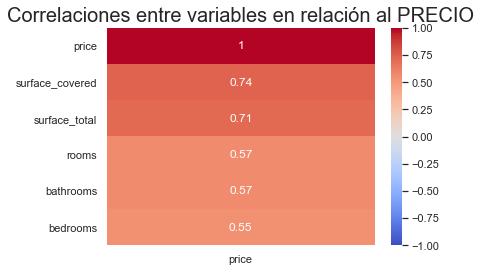

In [27]:
filtrado2 = filtrado.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtrado2[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO', size=20)

<div style="background-color: bisque; padding: 10px 10px 10px 10px">
    <li> Como puede observase, la correlación más alta con el precio pasa por las dimensiones de superficie </li>
   <div style="text-align: center">
    <h2>¿Es esto información valiosa? ¿Se necesita de un EDA para llegar a esta conclusión?</h2>
    </div>
</div>

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.



<div style="background-color: bisque; text-align: center; padding: 10px 10px 10px 10px">
<h3>¿Aumentará la correlación entre precio y superficie cubierta si ajustamos las consideraciones en función de regiones geográficas más específicas?</h3>
    <h3>¿Será este el mejor predictor de la variable precio?</h3>
</div>

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### CHECKPOINT

In [28]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df = df[df.l2 == 'Capital Federal']
df = df[(df.property_type == 'Departamento') | (df.property_type == 'PH') | (df.property_type == 'Casa')]
df = df[(df.surface_total <= 1000) & (df.surface_total >= 15)]
df = df[(df.price <= 4000000)]
df = df.loc[:, ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df = df.dropna()
display('Número de registros ', df.shape[0])

'Número de registros '

81019

### Seleccionar las variables predictoras (X) y la variable a predecir (y).

<div style= "background-color: bisque; padding: 5px 5px 5px">
<li >Elegimos como <strong>varaibles predictoras a surface_covered</strong>, que mostró mayor correlación con precio <strong> y a rooms</strong>, a pesar de que esta variable haya estado por detrás de la correlación mostrada con superficie_total</li> 
<li >Supongo que esa información puede ser valiosa ya que podemos suponer que puede agregar más información y que elegir surface_total podría resultar ser redundante para el modelo</li>
<h4>Pero es sólo una suposición que no sé si tiene fundamento </h4>
</div>

In [29]:
X = df[['surface_covered', 'rooms']]
y = df.price

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import tree

### Realizar un Train/Test split de los datos.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## KNNeighbors

In [55]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
# Creamos el regresor
rg_knn = KNeighborsRegressor(n_neighbors=8)
# Lo entrenamos
rg_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [56]:
#Predecimos
y_train_pred = rg_knn.predict(X_train)
y_test_pred = rg_knn.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error( y_test, y_test_pred )
rmse = np.sqrt(mse)
rmse

171696.32724858422

<div style= "background-color: bisque; padding: 5px 5px 5px">
    <h3>¿Por qué RMSE?</h3>
    <ul>
        <li>Para empezar, forma parte de los pocos métodos de evaluación visto hasta ahora en el curso a la hora de trabajar con regresores </li>
        <li>Por lo que entiendo, tanto el MAE como el RMSE son opciones válidas como métricas de evaluación de regresores, pero el RMSE es más apropiado en casos donde se quiere limitar especialmente el peso de errores de predicción muy altos</li>
        <li>Y teniendo en cuenta que en la creación del dataset analizado no se hizo un curado que llegue a profundidaes más consecuentes (como consirerar en especificidad el espacio geográfico), supuse que el RMSE sería más apropiado y sensible a tal escenario donde es esperable que los errores sean grandes, y así no queden menospreciados con un MAE</li>
    </ul>
</div>

In [35]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
knn = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]
i=0
# Generamos en loop sobre los distintos valores de k 
for k in knn:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    mse = mean_squared_error( y_train, y_train_pred )
    test_rmse = np.sqrt(mse)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mse)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_accuracy_test.append(test_rmse)

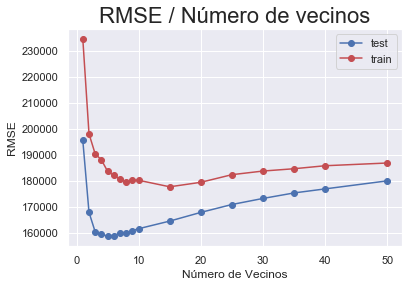

In [36]:
plt.plot(knn,lista_accuracy_test,'o-',label='test', c='b')
plt.plot(knn,lista_accuracy_train,'o-',label='train', c='r' )
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')
plt.title('RMSE / Número de vecinos', size=22)
plt.savefig('knn_proyecto01')

<div style= "background-color: bisque; padding: 5px 5px 5px">
    <li>El punto justo del desempeño del modelo paraciera encontrarse cerca de los 7 y 10 <i>n_neighborgs</i></li>
    <li>Es el punto donde pareciera que la suma de la métrica de error entre el set de testeo y entrenamiento es menor, y donde además se conserva una baja complejidad del modelo.
    
</div>

# Árbol de decision

In [58]:
#Importamos librería correspondiente
from sklearn import tree
#Creamos el modelo de árbol regresor
rg_tree = tree.DecisionTreeRegressor(max_depth=8, random_state=0)
#Entrenamos el árbol regresor
rg_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [59]:
#Predecimos
y_test_pred = rg_tree.predict(X_test)
y_train_pred = rg_tree.predict(X_train)

In [60]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
rmse

164100.86379871645

In [53]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
depth = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for d in depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_reg = tree.DecisionTreeRegressor(max_depth=d, random_state=0)
    
    # Entrenar el modelo
    tree_reg.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_reg.predict(X_train)
    mse = mean_squared_error( y_train, y_train_pred )
    test_rmse = np.sqrt(mse)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mse)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_accuracy_test.append(test_rmse)

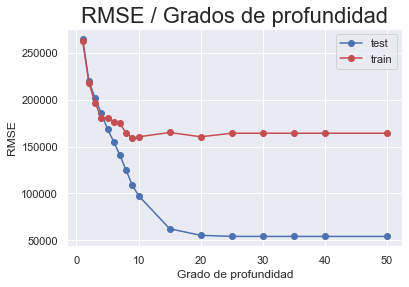

In [54]:
plt.plot(depth,lista_accuracy_test,'o-',label='test', c='b')
plt.plot(depth,lista_accuracy_train,'o-',label='train', c= 'r' )
plt.legend()
plt.xlabel('Grado de profundidad')
plt.ylabel('RMSE')
plt.title('RMSE / Grados de profundidad', size=22)
plt.savefig('dt_proyecto01')

<div style= "background-color: bisque; padding: 5px 5px 5px">
    <li>El punto justo del desempeño del modelo paraciera encontrarse cerca de los 10 <i>max_depth</i></li>
    <li>Es también un punto donde el modelo aún se mantiene simple con lo que puede esperarse un riesgo menor de overfitting</i></li>
</div>

<div style="background-color: bisque; padding: 5px 5px 5px; ">
    <h1 style="text-align: center">Indagación de pregunta de desafío</h1>
    <h2 style="text-align: center">Prediccón X Zona geográfica</h2>
    <li>Vamos a tomar un filtrado de uno de los barrios con más cantidad de unidades en alquiler: Palermo</li>
    <li>Vamos a ver si capacidad de predicción decrece <strong> significativamente</strong> o no</li>
</div>

In [42]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
dfP = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dfP = dfP[(dfP.l3 == 'Palermo')]
dfP = dfP[(dfP.property_type == 'Departamento') | (dfP.property_type == 'PH') | (dfP.property_type == 'Casa')]
dfP = dfP[(dfP.surface_total <= 1000) & (dfP.surface_total >= 15)]
dfP = dfP[(dfP.price <= 4000000)]
dfP = dfP.loc[:, ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
dfP = dfP.dropna()
display('Número de registros ', dfP.shape[0])

'Número de registros '

12218

In [43]:
# TOMAMOS LOS VALORES DE X e y // En esta ocasión probamos con todas las variables disponibles
X = dfP[['surface_covered', 'rooms', 'surface_total', 'bathrooms']]
y = dfP.price

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
k = 3
# Creamos el regresor
rgP_knn = KNeighborsRegressor(n_neighbors=k)
# Lo entrenamos
rgP_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [46]:
#Predecimos
y_train_pred = rgP_knn.predict(X_train)
y_test_pred = rgP_knn.predict(X_test)

In [47]:
mse = mean_squared_error( y_test, y_test_pred )
rmse = np.sqrt(mse)
rmse

171110.42579586402

<div style= "background-color: bisque; padding: 5px 5px 5px">
    <ul>
        <li>Observamos que hay una disminución del RMSE entre el primer y segundo árbol de vecinos</li>
        <li>Pasamos de un RMSE  de 190356 a otro de 171110, aunque por supuesto, estamos trabajando con un dataset diferente</li>
    </ul>
</div>

In [48]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
knn = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]
i=0
# Generamos en loop sobre los distintos valores de k 
for k in knn:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    KNNR = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    KNNR.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = KNNR.predict(X_train)
    mse = mean_squared_error( y_train, y_train_pred )
    test_rmse = np.sqrt(mse)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = KNNR.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mse)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_accuracy_test.append(test_rmse)

Text(0.5, 1.0, '[PALERMO] RMSE / Número de vecinos')

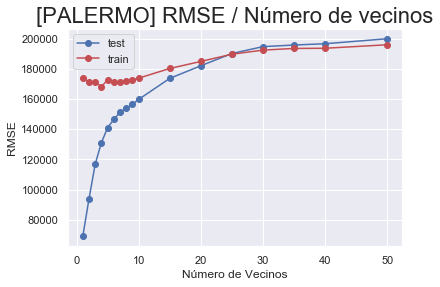

In [49]:
plt.plot(knn,lista_accuracy_test,'o-',label='test', c='b')
plt.plot(knn,lista_accuracy_train,'o-',label='train', c='r' )
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')
plt.title('[PALERMO] RMSE / Número de vecinos', size=22)

<div style= "background-color: bisque; padding: 5px 5px 5px">
    <li>Observamos que el comportamiento del modelo es diferente al caso anterior donde no se discriminó por zona geográfica</li>
    <li>El punto óptimo de knn pareciera estar en este caso alrededor de 4, donde la suma del RMSE test y train pareciera equilabrada</li>
</div>

### Observemos qué pasa internamente con las correlaciones en este dataset

Text(0.5, 1, 'Correlaciones entre variables')

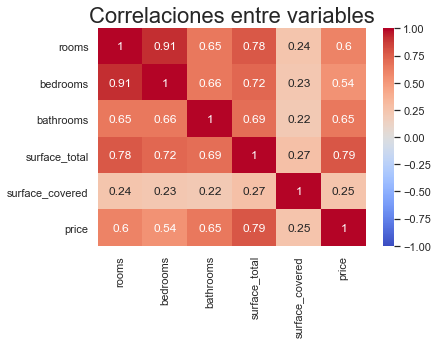

In [50]:
sns.heatmap(dfP.corr(), vmin=-1, cmap='coolwarm', annot= True).set_title('Correlaciones entre variables', size=22)

Text(0.5, 1, 'Correlaciones entre variables en relación al PRECIO')

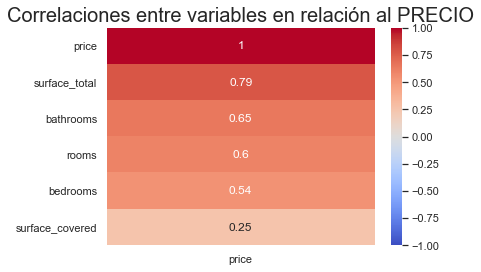

In [61]:
filtradoPalermo = dfP.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtradoPalermo[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO', size=20)

<div style= "background-color: bisque; padding: 5px 5px 5px">
    <h4>Cambios respecto al análisis anterior</h4>
    <li>Observamos un crecimiento de 4 centimas en el score de predicción más alta <i>surface_total</i> y una disminución por el mismo valor en la segunda variable más alta</li>
    <li>El punto óptimo de knn pareciera estar en este caso alrededor de 4, donde la suma del RMSE test y train pareciera equilabrada</li>
    <li>Manteniéndonos en este enfoque, no tenemos razones suficientes para suponer que un modelo entrenado por región sea más exitoso que el anterior.
    </li>
    <li>Quizás pueda deberse a que el modelo anterior compensa su éxito a razón de más casos de datos de entrenamiento</li>
</div>

<div style= "background-color: lightblue; padding: 5px 5px 5px">
    <h1>Observaciones críticas</h1>
    <h3>Hiperparámetros</h3>
    <ul>
        <li>No estoy explorando lo que sudece con la varición de aspectos como: <i>weights, algorithm, leaf_size, p...</i></li>
    </ul>
    <h3>Parámetros</h3>
    <ul>
        <li>Como dije anteriormente, no estamos buscando correlaciones en función en datos geográficos, lo que responde a las limitaciones técnicas con las que nos encontramos en este punto de nuestra formación.</li>
        <li>Seguramente los modelos sean mucho más precisos si los ajustásemos al nivel de localidad como barrios</li>
        <li>De la mism manera, como lo sugerí en un comienzo de esta sección, estamos trabajando con variables de entrenamiento que parecieran ser redundantes  (superficie cubierta y total) y correlacionadas (rooms y bedrooms) sin mucha información novedosa que no sea evidente por sí misma</li>
    </ul>
    </div>

<div style= "background-color: lightgreen; padding: 5px 5px 5px">
    <h1>Observaciones constructivas</h1>
    <ul>
        <li>Si bien lo realizado no es sí mismo nada potente ni destacado, representa para nosotros todo un proceso de aprendizaje organizado de lo que implica trbajar en EDA y modelado.</li>
        <li>Yo sé que el evaluador quizás no sea de Acámica, pero quiero aprovechar este espacio para felicitarlos por la organización pedagógica y didáctica del curso: fantásticamente organizada.  </li>
    </ul>
</div>